<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Sajjad Amini</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>

# Problem Set 02

Welcome to your second assignment. This exercise gives you a brief introduction to Python. 


STUDENT NAME: AmirHossein Akbari

STUDENT ID: 99105901

## Import 
>Put all of your imports for this file in the below cell.

In [51]:
### START CODE HERE ###
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
### END CODE HERE ###

# Question 1

## Array creation
>Create the followings to numpy array:
* A: a 3\*3 array like this:
$$
A = \left(\begin{array}{cc} 
10 & 20 & 30\\
5 & 10 & 15\\
1 & 5 & 8
\end{array}\right)
$$ 
* B: a 3\*3\*4 that filled with the numbers start from 15 and have steps of 5 to the end. The array should be filled first along the first dimension then the second dimension and at last the third dimension. like this:
$$
B[:, :, 0] = \left(\begin{array}{cc} 
15 & 30 & 45\\
20 & 35 & 50\\
25 & 40 & 55
\end{array}\right)
$$ 

In [52]:
### START CODE HERE ###
A = np.array([[10, 20, 30],[5, 10, 15],[1, 5, 8]])
B = np.array(range(15, 195, 5)).reshape(4,3,3).T

### END CODE HERE ###

## Replacement
>Replace the last slice of array B (B[:, :, 3]) with values of A. Then print the result.

In [53]:
### START CODE HERE ###
for i in range(4):
    print(B[:,:,i],'\n')
print('\n\n')

B[:,:,3] = A
for i in range(4):
    print(B[:,:,i],'\n')

### END CODE HERE ###

[[15 30 45]
 [20 35 50]
 [25 40 55]] 

[[ 60  75  90]
 [ 65  80  95]
 [ 70  85 100]] 

[[105 120 135]
 [110 125 140]
 [115 130 145]] 

[[150 165 180]
 [155 170 185]
 [160 175 190]] 




[[15 30 45]
 [20 35 50]
 [25 40 55]] 

[[ 60  75  90]
 [ 65  80  95]
 [ 70  85 100]] 

[[105 120 135]
 [110 125 140]
 [115 130 145]] 

[[10 20 30]
 [ 5 10 15]
 [ 1  5  8]] 



## Axis Swap 
>Swap the first(B[:, :, 0]) and last(B[:, :, 3]) slice of the array B **only with one line of code**. Then print the result.

In [54]:
### START CODE HERE ###

B[:,:,[0,3]] = B[:,:,[3,0]]

### END CODE HERE ###

## Transposing 
>Transpose the array B elements in each slice. Then print the result.

In [55]:
### START CODE HERE ###
for i in range(4):
    B[:,:,i] = B[:,:,i].T
for i in range(4): print(B[:,:,i],"\n")
### END CODE HERE ###

[[10  5  1]
 [20 10  5]
 [30 15  8]] 

[[ 60  65  70]
 [ 75  80  85]
 [ 90  95 100]] 

[[105 110 115]
 [120 125 130]
 [135 140 145]] 

[[15 20 25]
 [30 35 40]
 [45 50 55]] 



## Matrix Multiplication
>Calculate the matrix multiplication of all slices of the array B. 
(B[:, :, 0] \* B[:, :, 1] \* B[:, :, 2] \* B[:, :, 3]). Then print the result.

>**Note**: the result should be a 3\*3 array. 

In [56]:
### START CODE HERE ###
print(np.prod(B,axis=2))
### END CODE HERE ###

[[  945000   715000   201250]
 [ 5400000  3500000  2210000]
 [16402500  9975000  6380000]]


## Determinant
>Calculate the determinant of the array A and print it.

In [57]:
### START CODE HERE ###

print(np.linalg.det(A))
### END CODE HERE ###

0.0


# Question 2

## Loading dataset
>Load the IMDB-Movie-Data.csv file into a pandas dataframe and show its first 5 rows. Each row of this dataframe corresponds to one film.

In [58]:
### START CODE HERE ###
dataset = pd.read_csv(u'IMDB-Movie-Data.csv')
dataset[:5]
### END CODE HERE ###

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


## Actors/Actresses Activity
>For each Actors/Actresses caculate the number of movies in the dataframe, then sort the actors/actresses first by their number of movies in descending order and then by their name in ascending order. 

In [71]:
### START CODE HERE ###
casts = [i.replace(', ', ',').split(',')for i in dataset["Actors"]]
act = []
for i in casts: act += i
act = list(set(act))
films = [0] * len(act)
print(len(act))
for i in range(len(act)):
    for j in casts:
        if act[i] in j:
            films[i] += 1
data = pd.DataFrame({'Actor': act, 'Nmovies': films})
data1 = data.sort_values(by='Nmovies', ascending=False)
data2 = data.sort_values(by='Actor')
print(data1[:5])
print(data2[:5])
### END CODE HERE ###

1985
                   Actor  Nmovies
1036       Mark Wahlberg       15
619         Hugh Jackman       14
1422      Christian Bale       13
1962           Brad Pitt       13
1629  Scarlett Johansson       12
              Actor  Nmovies
1875        50 Cent        1
131   A.C. Peterson        1
817     AJ Michalka        1
825      Aamir Khan        4
1015    Aaron Burns        2


## Score Histogram
>Draw the histogram of metascores and ratings. 

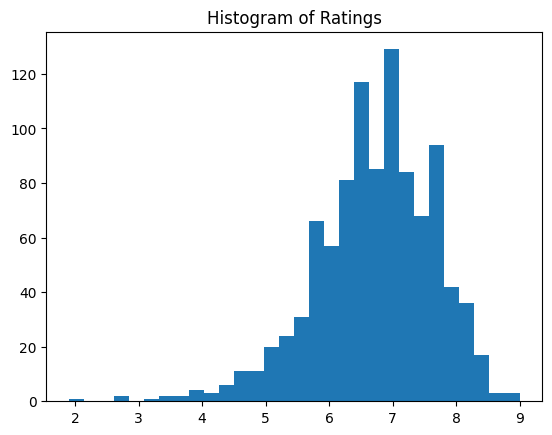

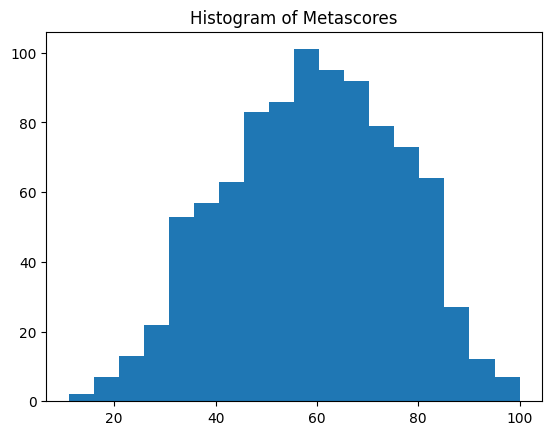

In [72]:
### START CODE HERE ###
ratings, metascores = dataset["Rating"], dataset["Metascore"]
plt.hist(ratings, bins='auto')
plt.title("Histogram of Ratings")
plt.show()
plt.hist(metascores, bins='auto')
plt.title("Histogram of Metascores")
plt.show()
### END CODE HERE ###

## Correlations
>Calculate the correlation between rating, votes and metascore of the movies.
Is there any meaningful relation between these features? 

In [73]:
### START CODE HERE ###
votes = dataset["Votes"]
np.corrcoef([ratings, votes, metascores])
### END CODE HERE ###

array([[1.        , 0.51153732,        nan],
       [0.51153732, 1.        ,        nan],
       [       nan,        nan,        nan]])

# Question 3

## File
> Craet a .txt file and name it "Name_actors". You must write the name of all actors/actresses in the IMDB-Movie-Data.csv file. Don't write a name multiple time and write each name in a new line.

In [74]:
### START CODE HERE ###
casts = [i.replace(', ', ',').split(',')for i in dataset["Actors"]]
act = []
for i in casts: act += i
act = list(set(act))
file = open('Name_actors.txt','w')
for item in act:
	file.write(item+"\n")
file.close()

### END CODE HERE ###

# Question 4

## Plot
>You must plot the number of movies in each year according to the IMDB-Movie-Data.csv file. X-axis is year and y-axis show the number of movies in each year.
> set the x_label, y_label and title for your plot.

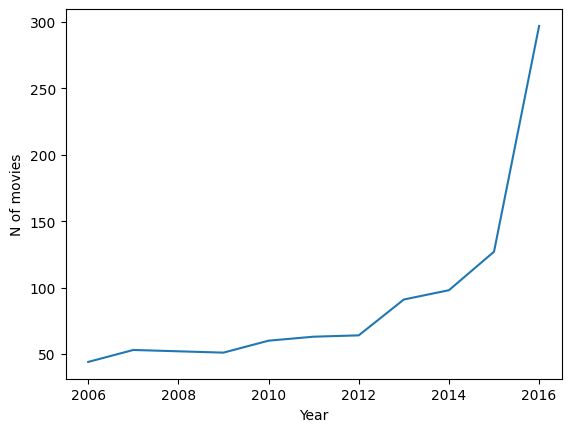

In [93]:
### START CODE HERE ###
d = list(dataset['Year'])
years = list(set(d))
years.sort()
cnt = [0] * len(years)
for i in range(len(years)) :
    cnt[i] = d.count(years[i])
plt.plot(years, cnt)
plt.xlabel("Year")
plt.ylabel("N of movies")
plt.show()
### END CODE HERE ###

## Plot
>You must plot the cos(x) curve. plot 20 cycle of the curve. the frequency of first half of curve is 50 Hz and frequency of second lalf is 200 Hz. 
> set the x_label, y_label and title for your plot.

Text(0, 0.5, 'cos(x)')

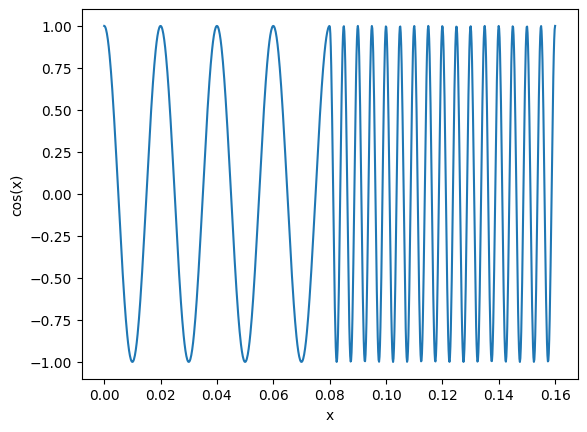

In [96]:
### START CODE HERE ###
x = np.linspace(0, 0.16, 1000)
y1 = np.cos(100 * np.pi * x)
y2 = np.cos(400 * np.pi * x)
y = (x <= 0.08) * y1 + (x > 0.08) * y2
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("cos(x)")
### END CODE HERE ###